# Zajecie 6

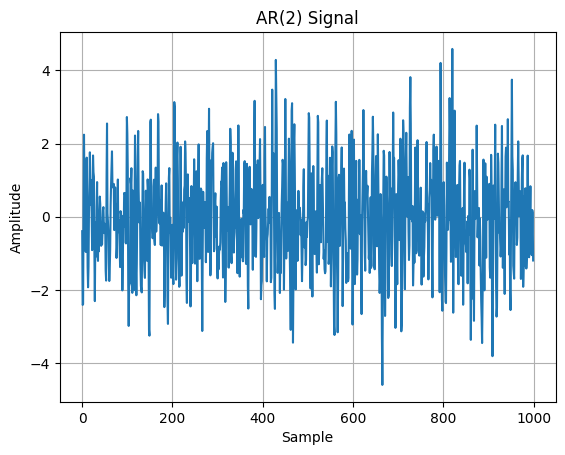

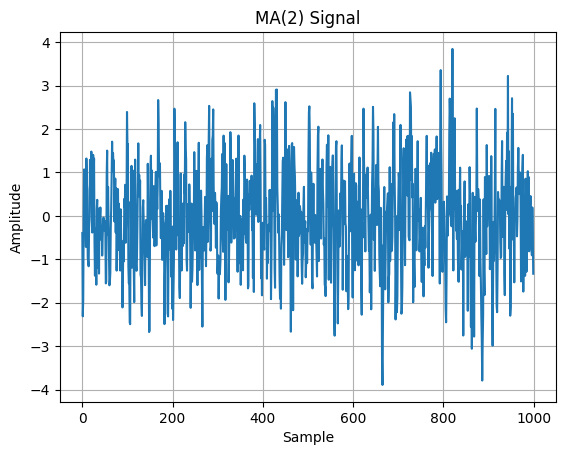

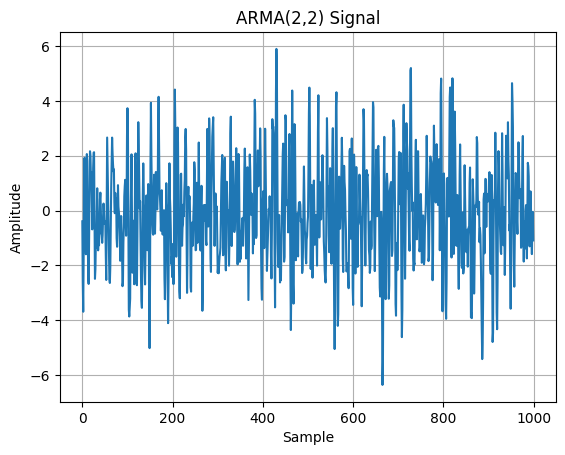

Estimated AR Coefficients: [-0.7355733   0.51322967]
Estimated Noise Variance: 1.020829063037348


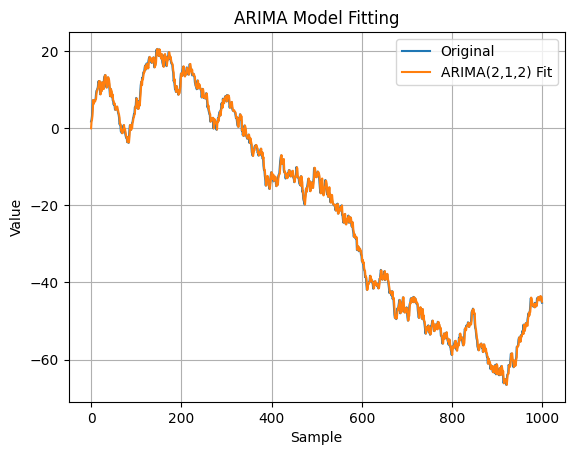

In [2]:
#1. Simulating an AR(2) Process

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

N = 1000
w = np.random.normal(0, 1, N)
a = [1, -0.75, 0.5]  # AR coefficients
ar_signal = lfilter([1], a, w)

plt.plot(ar_signal)
plt.title("AR(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#2. Simulating an MA(2) Process

b = [1.0, 0.5, 0.25]  # MA coefficients
ma_signal = lfilter(b, [1], w)

plt.plot(ma_signal)
plt.title("MA(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#3. Simulating an ARMA(2,2) Process

a = [1, -0.75, 0.5]
b = [1.0, 0.5, 0.25]
arma_signal = lfilter(b, a, w)

plt.plot(arma_signal)
plt.title("ARMA(2,2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#4. Estimating AR Model Parameters (Yule-Walker)

from statsmodels.regression.linear_model import yule_walker

rho, sigma = yule_walker(ar_signal, order=2)
print("Estimated AR Coefficients:", -rho)
print("Estimated Noise Variance:", sigma)


#5. ARIMA Modeling


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate non-stationary signal: a trend + noise
N = 1000
np.random.seed(0)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARIMA(p=2, d=1, q=2)
model = ARIMA(trend, order=(2, 1, 2))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=0, end=N-1)

plt.plot(trend, label="Original")
plt.plot(forecast, label="ARIMA(2,1,2) Fit")
plt.legend()
plt.title("ARIMA Model Fitting")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()



## Comparison Example: ARMA vs ARIMA

To demonstrate the difference between ARMA and ARIMA modeling approaches, consider a signal with a clear trend component. An ARMA model assumes stationarity and may not perform well without preprocessing (e.g., detrending), while an ARIMA model can inherently handle such trends through differencing.


c:\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


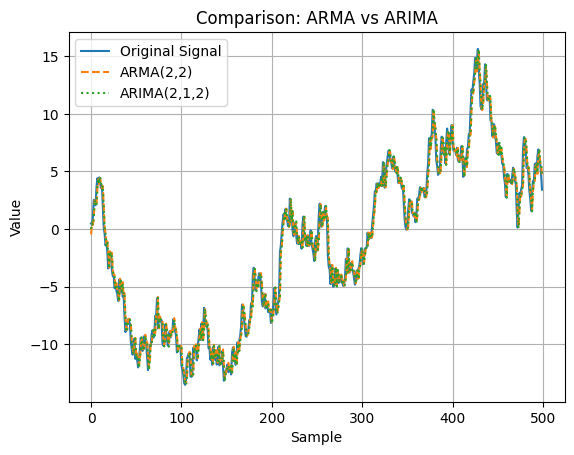

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

# Create a non-stationary signal with a linear trend
N = 500
np.random.seed(42)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARMA(2,2) model to non-stationary signal
arma_model = ARIMA(trend, order=(2, 0, 2))
arma_result = arma_model.fit()
arma_pred = arma_result.predict(start=0, end=N-1)

# Fit ARIMA(2,1,2) model
arima_model = ARIMA(trend, order=(2, 1, 2))
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=0, end=N-1)

# Plotting
plt.plot(trend, label="Original Signal")
plt.plot(arma_pred, label="ARMA(2,2)", linestyle='--')
plt.plot(arima_pred, label="ARIMA(2,1,2)", linestyle=':')
plt.title("Comparison: ARMA vs ARIMA")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


c:\Python313\Lib\site-packages\spectrum\psd.py:192: SyntaxWarning: invalid escape sequence '\p'
  :param bool scale_by_freq: divide the final PSD by :math:`2*\pi/df`
c:\Python313\Lib\site-packages\spectrum\psd.py:348: SyntaxWarning: invalid escape sequence '\p'
  doc="scale the PSD by :math:`2*\pi/df`")
c:\Python313\Lib\site-packages\spectrum\psd.py:767: SyntaxWarning: invalid escape sequence '\p'
  :param bool scale_by_freq: Divide the final PSD by :math:`2*\pi/df`
c:\Python313\Lib\site-packages\spectrum\psd.py:907: SyntaxWarning: invalid escape sequence '\p'
  :param bool scale_by_freq: Divide the final PSD by :math:`2*\pi/df`
c:\Python313\Lib\site-packages\spectrum\tools.py:172: SyntaxWarning: invalid escape sequence '\l'
  .. math::    X_{dB} = 10 * \log_{10}(x)
c:\Python313\Lib\site-packages\spectrum\tools.py:239: SyntaxWarning: invalid escape sequence '\l'
  .. math::    X_{dB} = 20 * \log_{10}(x)
c:\Python313\Lib\site-packages\spectrum\burg.py:98: SyntaxWarning: invalid escape s

Yule-Walker Estimated AR Coefficients: [ 0.68350635 -0.19229913  0.07572402]
Burg Estimated AR Coefficients: [-0.68594688+0.j  0.19531098+0.j -0.07763574+0.j]


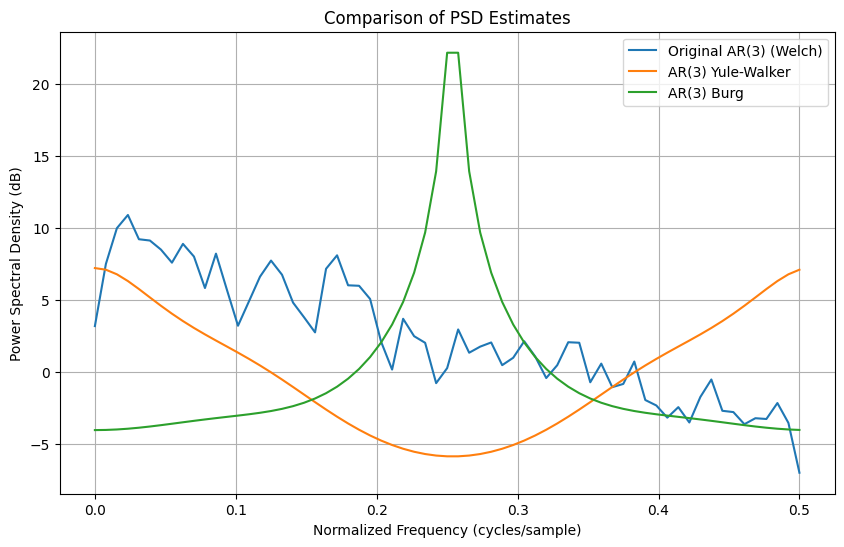

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import yule_walker
from scipy.signal import welch
from spectrum import arburg

# 1. Simulate an AR(3) signal
np.random.seed(42)  # for reproducibility
n_samples = 500
ar_coeffs_true = np.array([0.7, -0.2, 0.1])
noise = np.random.randn(n_samples + 3)
ar_signal = np.zeros(n_samples + 3)
for i in range(3, n_samples + 3):
    ar_signal[i] = ar_coeffs_true[0] * ar_signal[i-1] + \
                   ar_coeffs_true[1] * ar_signal[i-2] + \
                   ar_coeffs_true[2] * ar_signal[i-3] + \
                   noise[i]
ar_signal = ar_signal[3:]

# 2. Fit AR(3) using Yule-Walker
ar_coeffs_yw, sigma_yw = yule_walker(ar_signal, order=3, method='mle')
print("Yule-Walker Estimated AR Coefficients:", ar_coeffs_yw)

# 3. Fit AR(3) using Burg
model_burg = arburg(ar_signal, order=3)
ar_coeffs_burg = model_burg[0]
print("Burg Estimated AR Coefficients:", ar_coeffs_burg)

# 4. Compare Frequency-Domain PSDs

# a) PSD of the original AR(3) signal (using Welch's method)
freq_orig, psd_orig = welch(ar_signal, nperseg=128)

# b) PSD from Yule-Walker AR(3) coefficients
# The PSD of an AR(p) process with coefficients a_k and noise variance sigma^2 is:
# P(f) = sigma^2 / |1 - sum(a_k * exp(-j*2*pi*f*k))|^2
def ar_psd(coeffs, sigma, n_points=512):
    coeffs = np.r_[1, -coeffs]
    freq = np.linspace(0, 0.5, n_points)
    psd = sigma / np.abs(np.fft.fft(coeffs, n=n_points))**2
    return freq, psd

freq_yw, psd_yw = ar_psd(ar_coeffs_yw, sigma_yw, n_points=len(freq_orig))

# c) PSD from Burg AR(3) coefficients
sigma_burg_est = model_burg[1]  # Estimated white noise variance
freq_burg, psd_burg = ar_psd(ar_coeffs_burg, sigma_burg_est, n_points=len(freq_orig))

# Plot the PSDs
plt.figure(figsize=(10, 6))
plt.plot(freq_orig, 10*np.log10(psd_orig), label='Original AR(3) (Welch)')
plt.plot(freq_yw, 10*np.log10(psd_yw), label='AR(3) Yule-Walker')
plt.plot(freq_burg, 10*np.log10(psd_burg), label='AR(3) Burg')
plt.title('Comparison of PSD Estimates')
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Power Spectral Density (dB)')
plt.legend()
plt.grid(True)
plt.show()

This example illustrates that ARIMA models better capture trends by incorporating differencing, while ARMA models may yield biased or poor fits unless the signal is preprocessed to be stationary.
